In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
plt.rcParams # kullandigimiz grafiklerin default ozelliklerini gosterir

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [42]:
plt.rcParams["figure.figsize"] = (10, 6) # grafiklerin default boyutlarini degistiriyoruz

plt.rcParams["xtick.labelsize"] = 8 # x ekseni yazilarinin boyutunu degistiriyoruz
plt.rcParams["ytick.labelsize"] = 8 # y ekseni yazilarinin boyutunu degistiriyoruz

plt.rcParams["axes.labelsize"] = 10 #  eksen adlarinin boyutunu degistiriyoruz

In [7]:
data_1 = sns.load_dataset("penguins")
data_1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Seaborn ile Histogram

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

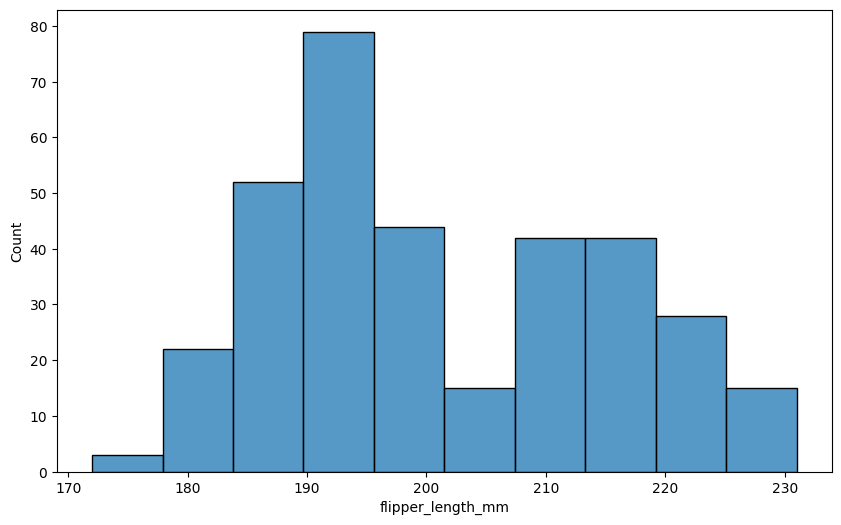

In [ ]:
sns.histplot(data = data_1, x = "flipper_length_mm") # tum penguenlerin yuzgec uzunluklarinin histogrami

In [10]:
data_1_male = data_1[data_1["sex"] == "Male"]["flipper_length_mm"]
data_1_female = data_1[data_1["sex"] == "Female"]["flipper_length_mm"]

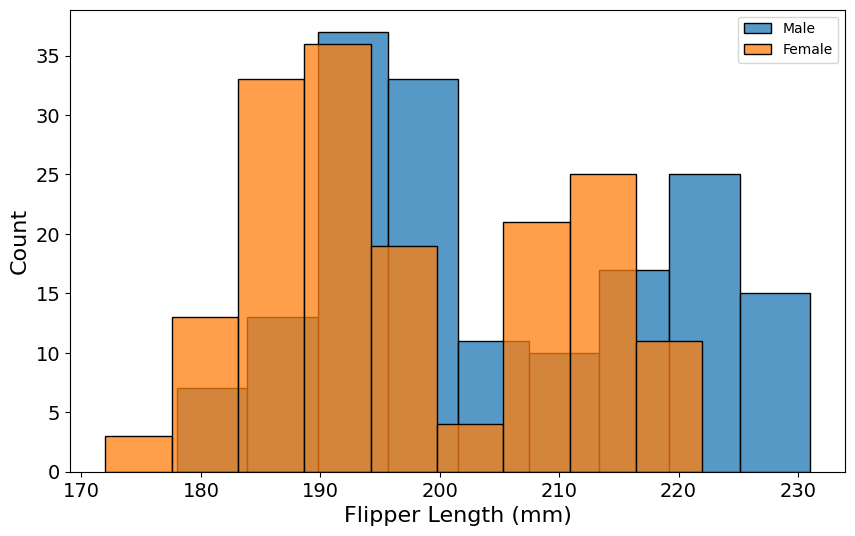

In [17]:
sns.histplot(data = data_1_male, label = "Male")
sns.histplot(data = data_1_female, label = "Female")
plt.xlabel("Flipper Length (mm)")

plt.legend()
plt.show()

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

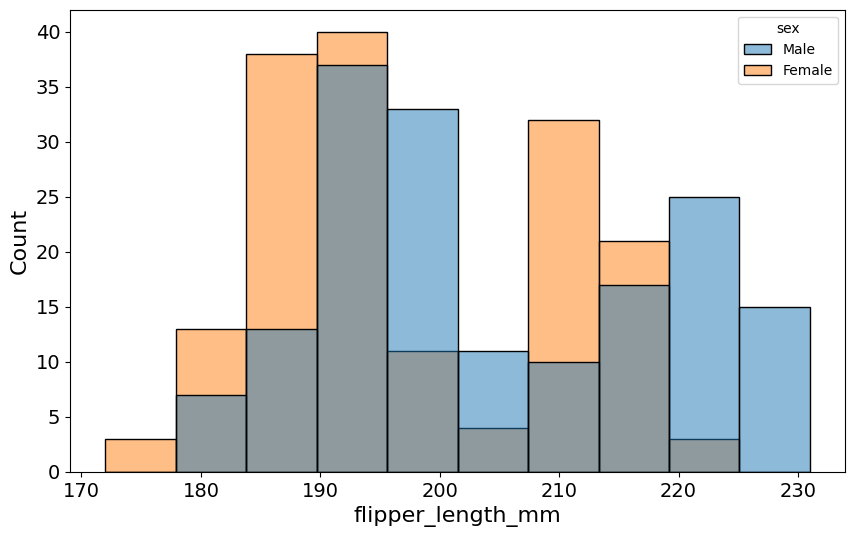

In [15]:
sns.histplot(data = data_1, x = "flipper_length_mm", hue = "sex")

## Seaborn ile Scatterplot

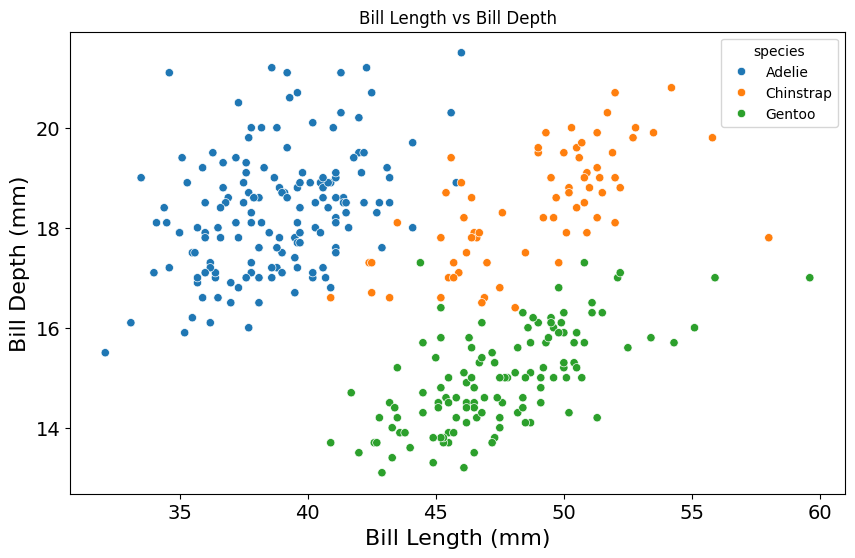

In [20]:
sns.scatterplot(data = data_1, x = "bill_length_mm", y = "bill_depth_mm", hue = "species") # penguenlerin gaga uzunlugu ve derinligi arasindaki iliski
plt.title("Bill Length vs Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

## Seaborn ile Barplot

In [24]:
gruplanmis_data = data_1.groupby(["species", "sex"])["body_mass_g"].mean().reset_index()

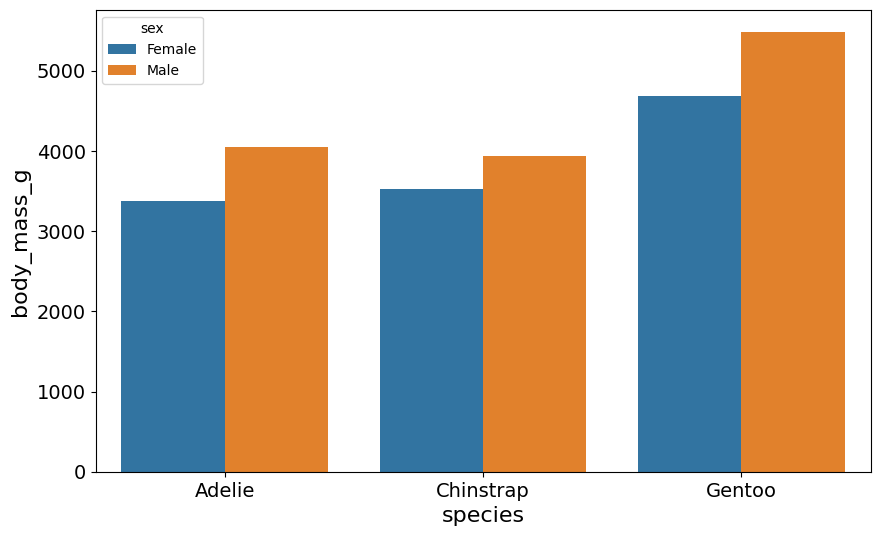

In [ ]:
sns.barplot(data = gruplanmis_data, x = "species", y = "body_mass_g", hue = "sex")
plt.show()

## Subplot Olusturma

(<Figure size 1000x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

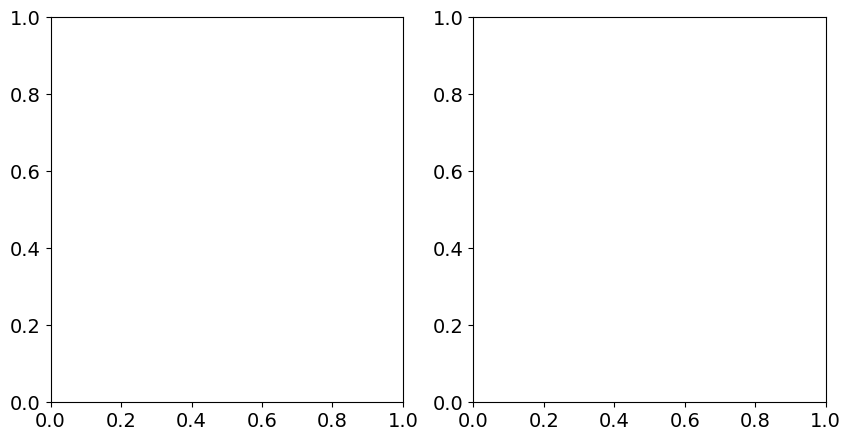

In [36]:
plt.subplots(1, 2, figsize = (10, 5))

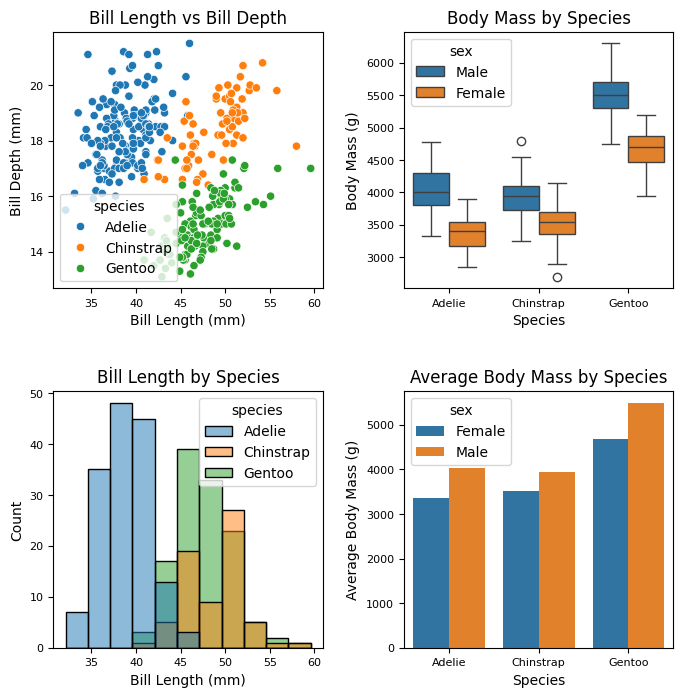

In [64]:
fig, axes = plt.subplots(2, 2 , figsize = (8, 8)) # 2 satir 2 sutunluk bir subplot olusturduk

fig.subplots_adjust(
    hspace = 0.4,
    wspace = 0.3
) # subplotlar arasindaki bosluklari ayarladik

sns.scatterplot(data = data_1, x = "bill_length_mm", y = "bill_depth_mm", hue = "species", ax = axes[0, 0]) # 1. subplot
axes[0, 0].set_title("Bill Length vs Bill Depth") # 0. satir 0. sutundaki subplotun basligini ayarladik
axes[0, 0].set_xlabel("Bill Length (mm)")
axes[0, 0].set_ylabel("Bill Depth (mm)")

sns.boxplot(data = data_1, x = "species", y = "body_mass_g", hue = "sex", ax = axes[0, 1]) # 2. subplot
axes[0, 1].set_title("Body Mass by Species") # 0. satir 1. sutundaki subplotun basligini ayarladik
axes[0, 1].set_xlabel("Species")
axes[0, 1].set_ylabel("Body Mass (g)")

sns.histplot(data = data_1, x = "bill_length_mm", hue = "species", ax = axes[1, 0]) # 3. subplot
axes[1, 0].set_title("Bİll Length by Species") # 1. satir 0. sutundaki subplotun basligini ayarladik
axes[1, 0].set_xlabel("Bill Length (mm)")
axes[1, 0].set_ylabel("Count")

sns.barplot(data = gruplanmis_data, x = "species", y = "body_mass_g", hue = "sex", ax = axes[1, 1]) # 4. subplot
axes[1, 1].set_title("Average Body Mass by Species") # 1. satir 1. sutundaki subplotun basligini ayarladik
axes[1, 1].set_xlabel("Species")
axes[1, 1].set_ylabel("Average Body Mass (g)")

plt.show()

In [72]:
dir(axes[0, 0]) # axes objesinin sahip oldugu method ve ozellikleri gosterir

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__annotate_func__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_different_canvas',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_process_units',
 '_fill_bet

Text(0, 0.5, 'Count')

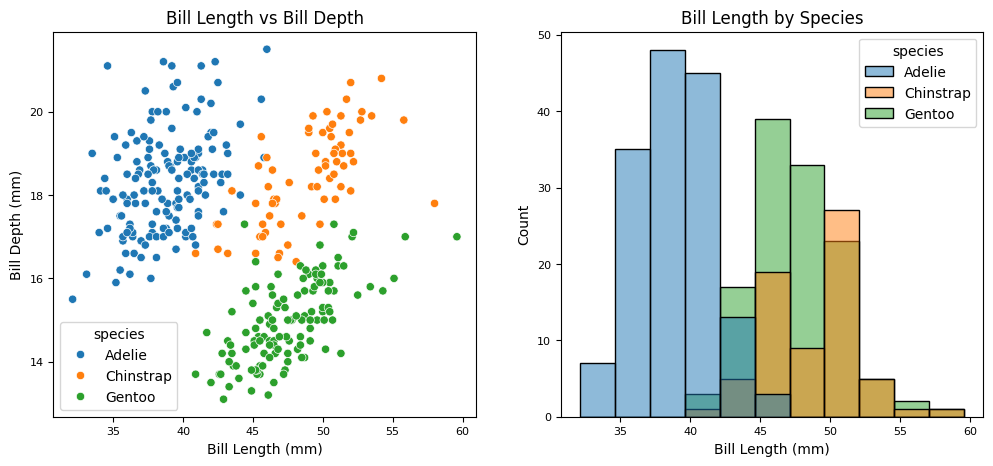

In [71]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1) # 1 satir 2 sutun -> 1. index (index)

sns.scatterplot(data = data_1, x = "bill_length_mm", y = "bill_depth_mm", hue = "species")
plt.title("Bill Length vs Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")

plt.subplot(1, 2, 2) # 1 satir 2 sutun -> 2. index

sns.histplot(data = data_1, x = "bill_length_mm", hue = "species")
plt.title("Bill Length by Species")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Count")